Found 971 images belonging to 35 classes.
Found 225 images belonging to 35 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

root_path = r"C:\Users\Jarushen\Desktop\Masters Thesis\Images\Fynbos"  # Your dataset path

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Adjust for ResNet50
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


# Load images from directory
train_generator = datagen.flow_from_directory(
    root_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    root_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


In [ ]:
top5_acc = TopKCategoricalAccuracy(k=5, name='top5_acc')
top10_acc = TopKCategoricalAccuracy(k=10, name='top10_acc')

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout

# Load the base model, pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# Assuming base_model is your pre-trained ResNet50 model
for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers
    layer.trainable = True





x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Adjusted number of neurons
x = Dropout(0.3)(x)  # Adjusted dropout rate
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Assuming the rest of the model setup code remains the same




# Rest of the model preparation code remains the same


# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model with a reduced initial learning rate
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/10
31/31 [==============================] - 1144s 37s/step - loss: 3.2707 - acc: 0.1576 - top_k_categorical_accuracy: 0.3893 - val_loss: 3.1928 - val_acc: 0.1822 - val_top_k_categorical_accuracy: 0.4178
Epoch 2/10
31/31 [==============================] - 1233s 40s/step - loss: 1.9752 - acc: 0.4871 - top_k_categorical_accuracy: 0.7745 - val_loss: 2.4808 - val_acc: 0.3111 - val_top_k_categorical_accuracy: 0.5378
Epoch 3/10
31/31 [==============================] - 1146s 37s/step - loss: 1.1515 - acc: 0.7106 - top_k_categorical_accuracy: 0.9217 - val_loss: 2.1889 - val_acc: 0.4578 - val_top_k_categorical_accuracy: 0.6978
Epoch 4/10
31/31 [==============================] - 1071s 35s/step - loss: 0.6803 - acc: 0.8280 - top_k_categorical_accuracy: 0.9670 - val_loss: 1.7866 - val_acc: 0.5467 - val_top_k_categorical_accuracy: 0.7511
Epoch 5/10
31/31 [==============================] - 1119s 36s/step - loss: 0.4127 - acc: 0.8980 - top_k_categorical_accuracy: 0.9825 - val_loss: 1.7350 - va

In [12]:
# Evaluate the model
val_loss, val_accuracy, val_top_5_accuracy, val_top_10_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")
print(f"Top-5 accuracy: {val_top_5_accuracy * 100:.2f}%")
print(f"Top-10 accuracy: {val_top_10_accuracy * 100:.2f}%")


8/8 [==============================] - 122s 15s/step - loss: 1.6902 - acc: 0.5867 - top_k_categorical_accuracy: 0.8000


ValueError: not enough values to unpack (expected 4, got 3)

In [6]:
import visualkeras
# Assuming 'model' is your Sequential model

# Specify the font size and style for labels (optional, depends on your system's availability of fonts)
# For Windows, you might need to provide the full path to a .ttf file
# font = ImageFont.truetype("arial.ttf", 12)

# Create a layered view with labels
# If font is not set, the default PIL font will be used
layered_view = visualkeras.layered_view(model, to_file='model_visualization_TransferA.png', legend=True)

# Save the visualization
layered_view.save('model_visualization_labeled_TrasnferA.png')


Classification Report


NameError: name 'classification_report' is not defined

In [14]:
validation_generator.reset()
Y_pred = model.predict(validation_generator)


NameError: name 'np' is not defined

In [15]:
import numpy as np 
y_pred = np.argmax(Y_pred, axis=1)

In [17]:
from sklearn.metrics import classification_report

# Generate target_names based on the classes present in the validation generator
target_names = [k for k, v in sorted(validation_generator.class_indices.items(), key=lambda item: item[1])]

# Generate the classification report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names, labels=np.arange(len(target_names))))

Classification Report
                             precision    recall  f1-score   support

      Agathosma serpyllacea       1.00      0.67      0.80         3
           Aloe arborescens       0.56      0.83      0.67         6
    Arctotis stoechadifolia       1.00      0.75      0.86         4
           Aristea capitata       0.75      0.75      0.75         4
     Baloskion tetraphyllum       1.00      0.50      0.67         4
      Carpobrotus chilensis       1.00      0.40      0.57         5
         Carpobrotus edulis       1.00      1.00      1.00         4
       Cotyledon orbiculata       0.60      0.33      0.43         9
           Curio talinoides       1.00      0.88      0.93         8
          Erica arborescens       0.40      0.80      0.53         5
              Erica cinerea       0.00      0.00      0.00         7
             Erica discolor       0.36      0.83      0.50         6
             Erica duthieae       0.20      0.33      0.25         3
           

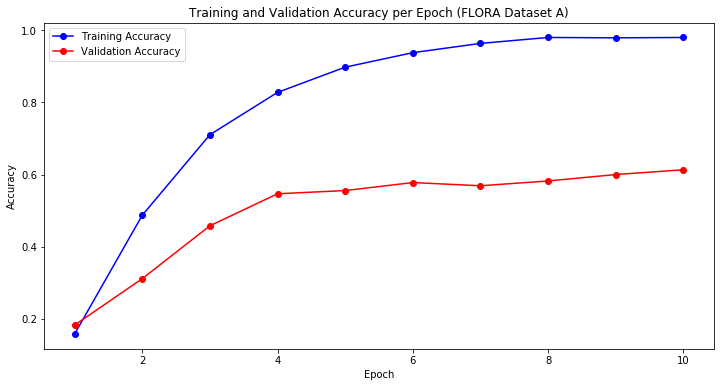

In [20]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method

# Extract the number of epochs
epochs = range(1, len(history.history['acc']) + 1)

# Extracting training and validation accuracy
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch (FLORA Dataset A)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


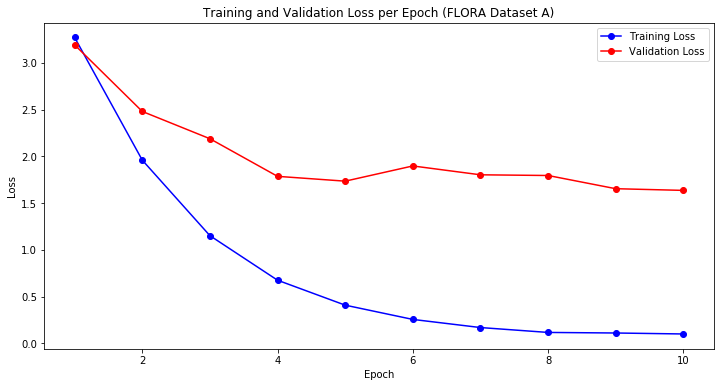

In [21]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method

# Extract the number of epochs
epochs = range(1, len(history.history['loss']) + 1)

# Extracting training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss per Epoch (FLORA Dataset A)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


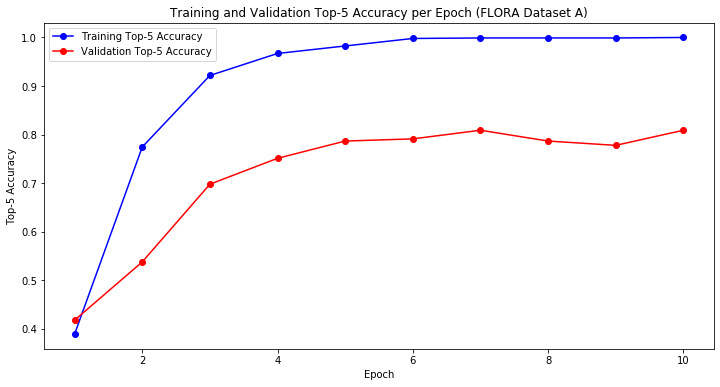

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method

# Extract the number of epochs
epochs = range(1, len(history.history['top_k_categorical_accuracy']) + 1)

# Extracting training and validation top-5 accuracy
training_top_5_accuracy = history.history['top_k_categorical_accuracy']
validation_top_5_accuracy = history.history['val_top_k_categorical_accuracy']

# Plotting Training and Validation Top-5 Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_top_5_accuracy, 'bo-', label='Training Top-5 Accuracy')
plt.plot(epochs, validation_top_5_accuracy, 'ro-', label='Validation Top-5 Accuracy')
plt.title('Training and Validation Top-5 Accuracy per Epoch (FLORA Dataset A)')
plt.xlabel('Epoch')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()
